# Project 4 - Subscribe term deposit prediction with Bank data

## About the data

Source:

[Moro et al., 2014] S. Moro, P. Cortez and P. Rita. A Data-Driven Approach to Predict the Success of Bank Telemarketing. Decision Support Systems, Elsevier, 62:22-31, June 2014

**Abstract**: The data is related with direct marketing campaigns (phone calls) of a Portuguese banking institution. The classification goal is to predict if the client will subscribe a term deposit (variable y).


### Data Set Information:

The data is related with direct marketing campaigns of a Portuguese banking institution. The marketing campaigns were based on phone calls. Often, more than one contact to the same client was required, in order to access if the product (bank term deposit) would be ('yes') or not ('no') subscribed.

There are four datasets:
- bank-additional-full.csv with all examples (41188) and 20 inputs, ordered by date (from May 2008 to November 2010), very close to the data analyzed in [Moro et al., 2014]
- bank-additional.csv with 10% of the examples (4119), randomly selected from 1), and 20 inputs.
- bank-full.csv with all examples and 17 inputs, ordered by date (older version of this dataset with less inputs).
- bank.csv with 10% of the examples and 17 inputs, randomly selected from 3 (older version of this dataset with less inputs).
The smallest datasets are provided to test more computationally demanding machine learning algorithms (e.g., SVM).

**The classification goal is to predict if the client will subscribe (yes/no) a term deposit (variable y).**


## Attribute Information:

Input variables:

#### bank client data:
- age (numeric)
- job : type of job (categorical: 'admin.','blue-collar','entrepreneur','housemaid','management','retired','self-employed','services','student','technician','unemployed','unknown')
- marital : marital status (categorical: 'divorced','married','single','unknown'; note: 'divorced' means divorced or widowed)
- education (categorical: 'basic.4y','basic.6y','basic.9y','high.school','illiterate','professional.course','university.degree','unknown')
- default: has credit in default? (categorical: 'no','yes','unknown')
- housing: has housing loan? (categorical: 'no','yes','unknown')
- loan: has personal loan? (categorical: 'no','yes','unknown')
#### related with the last contact of the current campaign:
- contact: contact communication type (categorical: 'cellular','telephone')
- month: last contact month of year (categorical: 'jan', 'feb', 'mar', ..., 'nov', 'dec')
- day_of_week: last contact day of the week (categorical: 'mon','tue','wed','thu','fri')
- duration: last contact duration, in seconds (numeric). Important note: this attribute highly affects the output target (e.g., if duration=0 then y='no'). Yet, the duration is not known before a call is performed. Also, after the end of the call y is obviously known. Thus, this input should only be included for benchmark purposes and should be discarded if the intention is to have a realistic predictive model.
#### other attributes:
- campaign: number of contacts performed during this campaign and for this client (numeric, includes last contact)
- pdays: number of days that passed by after the client was last contacted from a previous campaign (numeric; 999 means client was not previously contacted)
- previous: number of contacts performed before this campaign and for this client (numeric)
- poutcome: outcome of the previous marketing campaign (categorical: 'failure','nonexistent','success')
#### social and economic context attributes
- emp.var.rate: employment variation rate - quarterly indicator (numeric)
- cons.price.idx: consumer price index - monthly indicator (numeric)
- cons.conf.idx: consumer confidence index - monthly indicator (numeric)
- euribor3m: euribor 3 month rate - daily indicator (numeric)
- nr.employed: number of employees - quarterly indicator (numeric)

#### Output variable (desired target):
- y - has the client subscribed a term deposit? (binary: 'yes','no')



## Goal of the case study
In the above research paper, the reserchers have mentioned that the best results acheived is of AUC-0.8, so our goal for this case study will be to achieve similar results as of the research paper. Though it is to be mentioned that after going through the research paper I realised that the data does not have all the features that are mentioned in the paper. 


## Type of Machine Learning Problem:
It is a binary classification problem where our objective is to predict whether a customer will subscribe a term deposit or not given the data of the customer.

## Performance Metric:
The performance metric used in this case study is:
- AUC Score
- Accuracy
- Confusion Matrix

# Load the dataset
As a first step you must load the dataset.

Execute the code in the cell below to load the packages required to run this notebook.

In [123]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
import numpy.random as nr
import math

%matplotlib inline

In [126]:
import warnings
warnings.filterwarnings('ignore')

Execute the code in the cell below to load the dataset and print the first few rows of the data frame.

In [127]:
df = pd.read_csv('bank-additional-full.csv')
df.head(5)

,age,job,marital,education,default,housing,loan,contact,month,day_of_week,...,campaign,pdays,previous,poutcome,emp.var.rate,cons.price.idx,cons.conf.idx,euribor3m,nr.employed,y
0,56,housemaid,married,basic.4y,no,no,no,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
1,57,services,married,high.school,unknown,no,no,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
2,37,services,married,high.school,no,yes,no,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
3,40,admin.,married,basic.6y,no,no,no,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
4,56,services,married,high.school,no,no,yes,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no


In [128]:
df.tail(5)

,age,job,marital,education,default,housing,loan,contact,month,day_of_week,...,campaign,pdays,previous,poutcome,emp.var.rate,cons.price.idx,cons.conf.idx,euribor3m,nr.employed,y
41183,73,retired,married,professional.course,no,yes,no,cellular,nov,fri,...,1,999,0,nonexistent,-1.1,94.767,-50.8,1.028,4963.6,yes
41184,46,blue-collar,married,professional.course,no,no,no,cellular,nov,fri,...,1,999,0,nonexistent,-1.1,94.767,-50.8,1.028,4963.6,no
41185,56,retired,married,university.degree,no,yes,no,cellular,nov,fri,...,2,999,0,nonexistent,-1.1,94.767,-50.8,1.028,4963.6,no
41186,44,technician,married,professional.course,no,no,no,cellular,nov,fri,...,1,999,0,nonexistent,-1.1,94.767,-50.8,1.028,4963.6,yes
41187,74,retired,married,professional.course,no,yes,no,cellular,nov,fri,...,3,999,1,failure,-1.1,94.767,-50.8,1.028,4963.6,no


We will now perform some data preparation steps. 

In [129]:
df.describe()

,age,duration,campaign,pdays,previous,emp.var.rate,cons.price.idx,cons.conf.idx,euribor3m,nr.employed
count,41188.00000,41188.000000,41188.000000,41188.000000,41188.000000,41188.000000,41188.000000,41188.000000,41188.000000,41188.000000
mean,40.02406,258.285010,2.567593,962.475454,0.172963,0.081886,93.575664,-40.502600,3.621291,5167.035911
std,10.42125,259.279249,2.770014,186.910907,0.494901,1.570960,0.578840,4.628198,1.734447,72.251528
min,17.00000,0.000000,1.000000,0.000000,0.000000,-3.400000,92.201000,-50.800000,0.634000,4963.600000
25%,32.00000,102.000000,1.000000,999.000000,0.000000,-1.800000,93.075000,-42.700000,1.344000,5099.100000
50%,38.00000,180.000000,2.000000,999.000000,0.000000,1.100000,93.749000,-41.800000,4.857000,5191.000000
75%,47.00000,319.000000,3.000000,999.000000,0.000000,1.400000,93.994000,-36.400000,4.961000,5228.100000
max,98.00000,4918.000000,56.000000,999.000000,7.000000,1.400000,94.767000,-26.900000,5.045000,5228.100000


In [130]:
df.dtypes

age                 int64
job                object
marital            object
education          object
default            object
housing            object
loan               object
contact            object
month              object
day_of_week        object
duration            int64
campaign            int64
pdays               int64
previous            int64
poutcome           object
emp.var.rate      float64
cons.price.idx    float64
cons.conf.idx     float64
euribor3m         float64
nr.employed       float64
y                  object
dtype: object

We have 9 categorical features, 10 numeric features and a label (y)

Let's find missing values and remove them

In [131]:
df.isnull().sum()

age               0
job               0
marital           0
education         0
default           0
housing           0
loan              0
contact           0
month             0
day_of_week       0
duration          0
campaign          0
pdays             0
previous          0
poutcome          0
emp.var.rate      0
cons.price.idx    0
cons.conf.idx     0
euribor3m         0
nr.employed       0
y                 0
dtype: int64

Luckily, we dont have any missing values.

Now, lets look for duplicates

In [132]:
df.duplicated().sum()

12

We have a total of 12 duplicated rows. Lets remove them too.

In [133]:
df.drop_duplicates(keep='last', inplace=True)
df.duplicated().sum()

0

# Exploratory Data Analysis

## Visualize histogram and class separation by numeric features

The primary goal of visualization for classification problems is to understand which features are useful for class separation. In this section, we will start by visualizing the histogram and separation quality of numeric features. 

Value counts for age
31    1947
32    1845
33    1833
36    1779
35    1758
      ... 
91       2
98       2
87       1
94       1
95       1
Name: age, Length: 78, dtype: int64


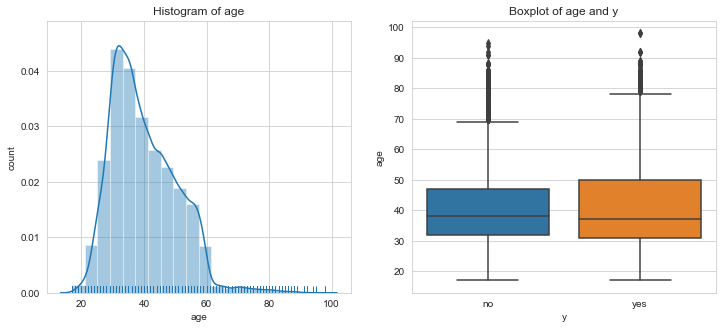

--------------------------------------------------------------------------------
Value counts for duration
90      170
85      170
136     168
73      167
124     163
       ... 
1594      1
1530      1
2231      1
1306      1
2015      1
Name: duration, Length: 1544, dtype: int64


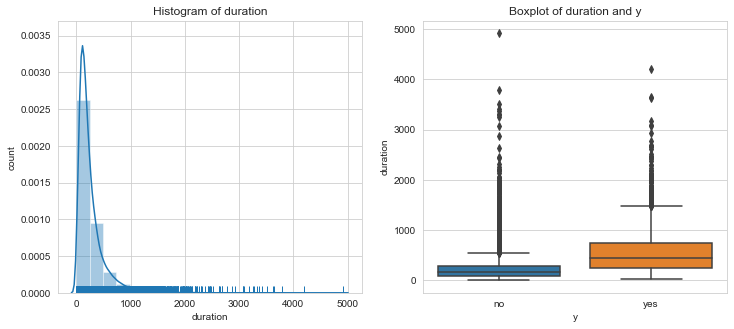

--------------------------------------------------------------------------------
Value counts for campaign
1     17634
2     10568
3      5340
4      2650
5      1599
6       979
7       629
8       400
9       283
10      225
11      177
12      125
13       92
14       69
17       58
15       51
16       51
18       33
20       30
19       26
21       24
22       17
23       16
24       15
27       11
29       10
26        8
28        8
25        8
30        7
31        7
35        5
33        4
32        4
34        3
43        2
42        2
40        2
41        1
56        1
39        1
37        1
Name: campaign, dtype: int64


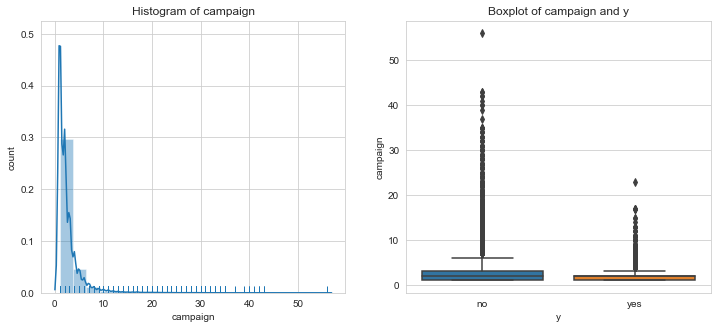

--------------------------------------------------------------------------------
Value counts for pdays
999    39661
3        439
6        412
4        118
9         64
2         61
7         60
12        58
10        52
5         46
13        36
11        28
1         26
15        24
14        20
8         18
0         15
16        11
17         8
18         7
19         3
22         3
21         2
20         1
25         1
26         1
27         1
Name: pdays, dtype: int64


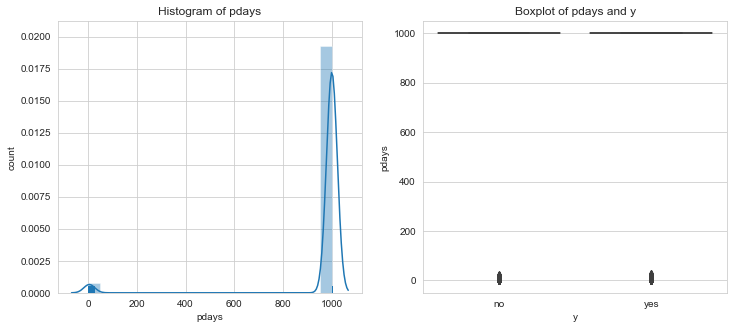

--------------------------------------------------------------------------------
Value counts for previous
0    35551
1     4561
2      754
3      216
4       70
5       18
6        5
7        1
Name: previous, dtype: int64


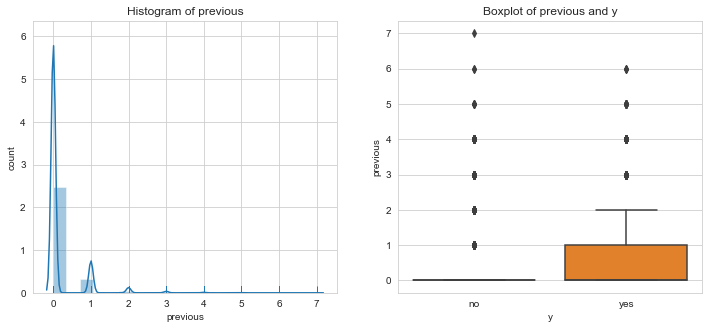

--------------------------------------------------------------------------------
Value counts for emp.var.rate
 1.4    16228
-1.8     9182
 1.1     7762
-0.1     3682
-2.9     1662
-3.4     1070
-1.7      773
-1.1      635
-3.0      172
-0.2       10
Name: emp.var.rate, dtype: int64


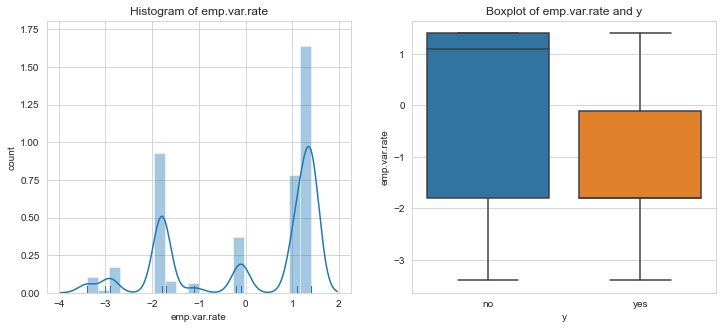

--------------------------------------------------------------------------------
Value counts for cons.price.idx
93.994    7762
93.918    6681
92.893    5793
93.444    5173
94.465    4374
93.200    3615
93.075    2457
92.201     770
92.963     715
92.431     446
92.649     357
94.215     311
94.199     303
92.843     282
92.379     267
93.369     264
94.027     233
94.055     229
93.876     212
94.601     204
92.469     177
93.749     174
92.713     172
94.767     128
93.798      67
92.756      10
Name: cons.price.idx, dtype: int64


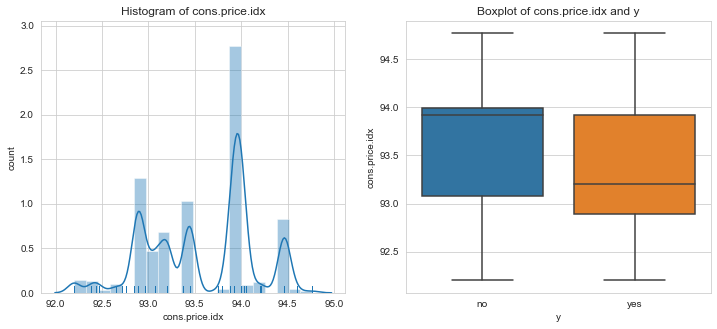

--------------------------------------------------------------------------------
Value counts for cons.conf.idx
-36.4    7762
-42.7    6681
-46.2    5793
-36.1    5173
-41.8    4374
-42.0    3615
-47.1    2457
-31.4     770
-40.8     715
-26.9     446
-30.1     357
-40.3     311
-37.5     303
-50.0     282
-29.8     267
-34.8     264
-38.3     233
-39.8     229
-40.0     212
-49.5     204
-33.6     177
-34.6     174
-33.0     172
-50.8     128
-40.4      67
-45.9      10
Name: cons.conf.idx, dtype: int64


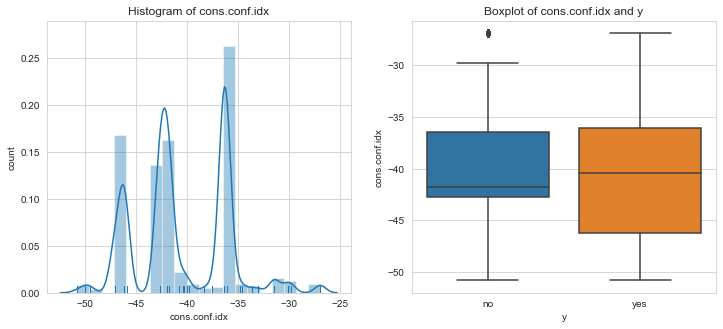

--------------------------------------------------------------------------------
Value counts for euribor3m
4.857    2868
4.962    2611
4.963    2487
4.961    1902
4.856    1210
         ... 
1.047       1
0.933       1
3.329       1
3.816       1
1.574       1
Name: euribor3m, Length: 316, dtype: int64


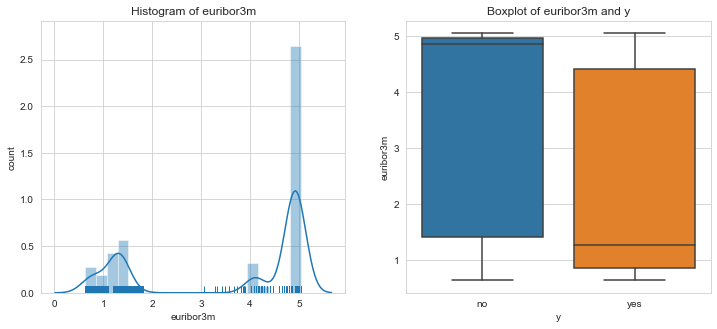

--------------------------------------------------------------------------------
Value counts for nr.employed
5228.1    16228
5099.1     8532
5191.0     7762
5195.8     3682
5076.2     1662
5017.5     1070
4991.6      773
5008.7      650
4963.6      635
5023.5      172
5176.3       10
Name: nr.employed, dtype: int64


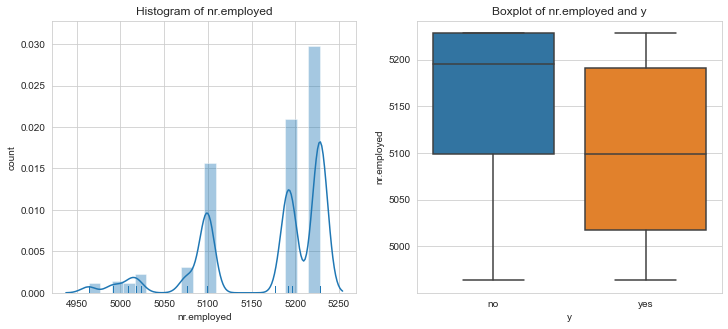

--------------------------------------------------------------------------------


In [134]:
def numcols_visuals(df, cols, col_x = 'y', bins = 10, hist = True):
    for col in cols:
        print("Value counts for " + col)
        print(df[col].value_counts())
        
        sns.set_style("whitegrid")
        plt.figure(figsize = (12,5))
        plt.subplot(1, 2, 1)
        sns.distplot(df[col], bins = bins, rug=True, hist = hist)
        plt.title('Histogram of ' + col) # Give the plot a main title
        plt.xlabel(col) # Set text for the x axis
        plt.ylabel('count')# Set text for y axis
        
        sns.set_style("whitegrid")
        plt.subplot(1, 2, 2)
        sns.boxplot(col_x, col, data=df)
        plt.title('Boxplot of ' + col + ' and y') # Give the plot a main title
        plt.xlabel(col_x) # Set text for the x axis
        plt.ylabel(col)# Set text for y axis
        
        plt.show()
        print("-"*80)
        

num_cols = ['age', 'duration', 'campaign',
            'pdays', 'previous', 'emp.var.rate', 'cons.price.idx', 'cons.conf.idx', 'euribor3m', 'nr.employed']
numcols_visuals(df, num_cols, bins = 20, hist = True)         

How can you interpret these results? Box plots are useful, since by their very construction you are forced to focus on the overlap (or not) of the quartiles of the distribution. In this case, the question is there sufficient differences in the quartiles for the feature to be useful in separation the label classes? The following cases are displayed in the above plots:
1. For emp.var.rate, cons.price.idx, euribor3m, and nr.employed there is useful separation between yes and no of the label (if the customer have subscribed the term deposit or not).  
2. On the other hand, age, campaigns, pdays, previous, and cons.conf.idx does not seem to matter. 
3. From the duration plot it is clear that, the duration (last contact duration) of a customer can be useful for predicting the target variable. It is expected because it is already mentioned in the data overview that this field highely affects the target variable and should only be used for benchmark purposes. So, we will not be able to include this feature in our final models, as obviously we want to create a realistic predictive model that can be used by the business.

## Correlation matrix of numerical features

Text(0.5, 1.05, 'Pearson correlation of Features')

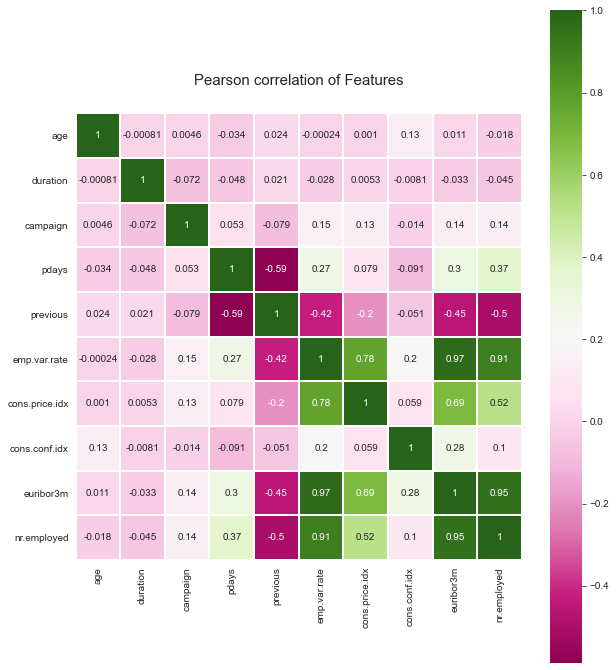

In [135]:
# Idea of correlation matrix of numerical feature: https://medium.com/datadriveninvestor/introduction-to-exploratory-data-analysis-682eb64063ff
%matplotlib inline
corr = df.corr()

f, ax = plt.subplots(figsize=(10,12))

cmap = sns.diverging_palette(220, 10, as_cmap=True)

_ = sns.heatmap(corr, cmap="PiYG", square=True, ax=ax, annot=True, linewidth=0.1)

plt.title("Pearson correlation of Features", y=1.05, size=15)

From the above heatmap we can see that there are some numerical features which share a high correlation between them, e.g nr.employed and euribor3m these features share a correlation value of 0.95, and euribor3m and emp.var.rate share a correlation of 0.97, which is very high compared to the other features that we see in the heatmap.

## Visualize class separation by categorical features

Now we will turn to the problem of visualizing the ability of categorical features to separate classes of the label. Ideally, a categorical feature will have very different counts of the categories for each of the label values. A good way to visualize these relationships is with bar plots.

The code in the cell below creates side by side plots of the categorical variables for each of the labels categories. 

job


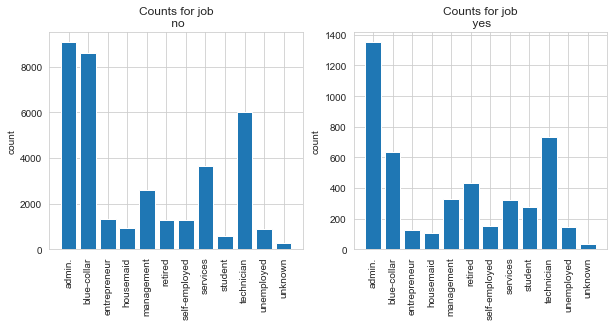

marital


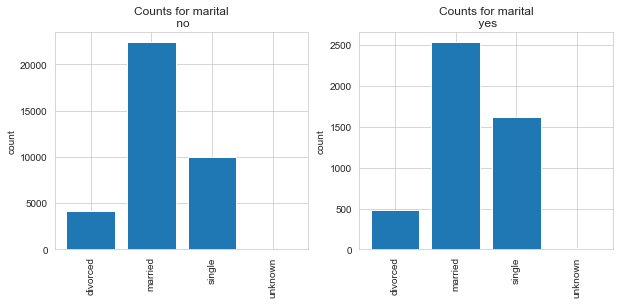

education


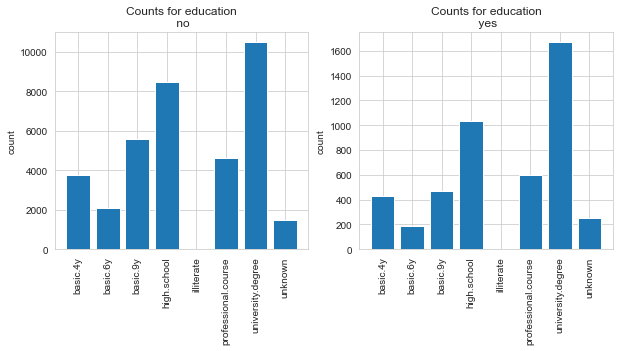

default


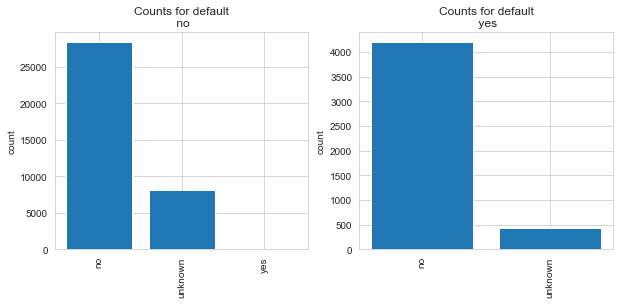

housing


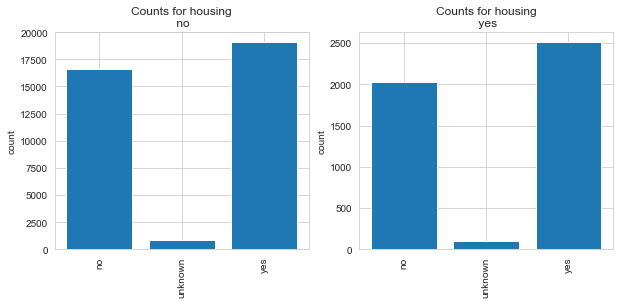

loan


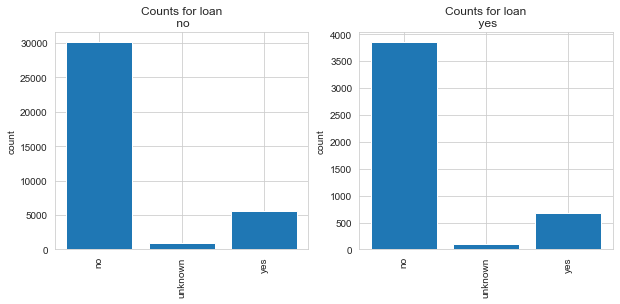

contact


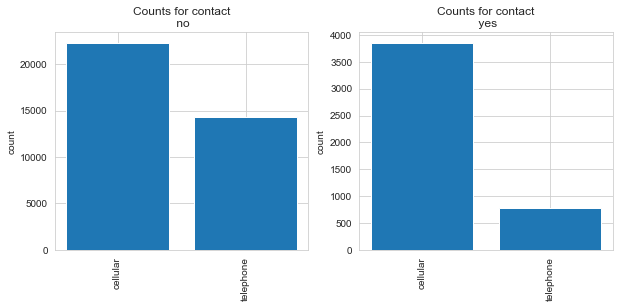

month


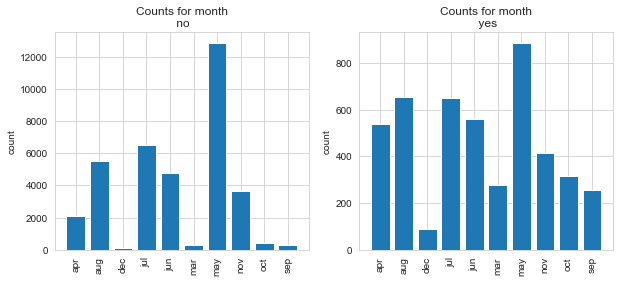

day_of_week


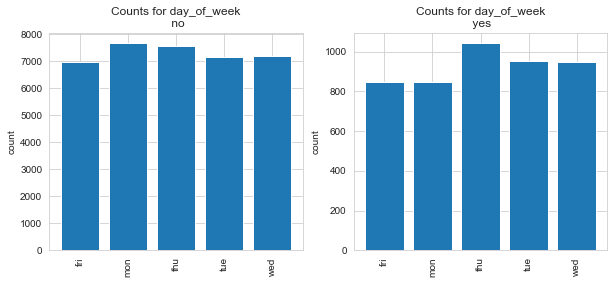

poutcome


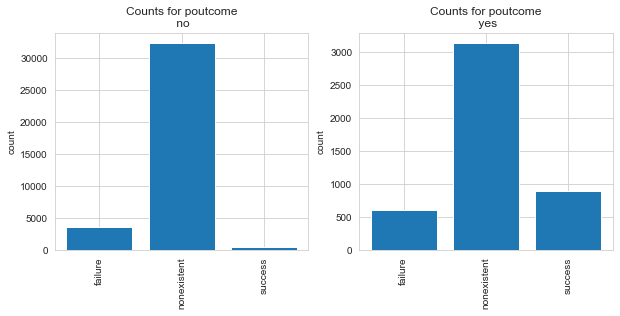

In [136]:
cat_cols = ['job', 'marital', 'education', 'default', 
                  'housing', 'loan', 'contact', 'month', 
                  'day_of_week', 'poutcome']

df['dummy'] = np.ones(shape = df.shape[0])
for col in cat_cols:
    print(col)
    counts = df[['dummy', 'y', col]].groupby(['y', col], as_index = False).count()
    temp = counts[counts['y'] == 'no'][[col, 'dummy']]
    _ = plt.figure(figsize = (10,4))
    plt.subplot(1, 2, 1)
    temp = counts[counts['y'] == 'no'][[col, 'dummy']]
    plt.bar(temp[col], temp.dummy)
    plt.xticks(rotation=90)
    plt.title('Counts for ' + col + '\n no')
    plt.ylabel('count')
    plt.subplot(1, 2, 2)
    temp = counts[counts['y'] == 'yes'][[col, 'dummy']]
    plt.bar(temp[col], temp.dummy)
    plt.xticks(rotation=90)
    plt.title('Counts for ' + col + '\n yes')
    plt.ylabel('count')
    plt.show()
    
df.drop(['dummy'], axis=1, inplace = True)

There is a lot of information in these plots. The key to interpreting these plots is comparing the proportion of the categories for each of the label values. If these proportions are distinctly different for each label category, the feature is likely to be useful in separating the label.  

There are several cases evident in these plots:
1. Some features such as jobs, contact, default, month, and poutcome have significantly different distribution of categories between the label categories. 
2. Other features like education and marital will likely have very little power to separate the cases. 
3. Others features such as day_of_week, loan, and housing show small differences, but these differences are unlikely to be significant.  

Notice that only a few of these categorical features will be useful in separating the cases. 

## Examine classes and class imbalance

In this case, the label has significant **class imbalance**. Class imbalance means that there are  unequal numbers of cases for the categories of the label. Class imbalance can seriously bias the training of classifier algorithms. It many cases, the imbalance leads to a higher error rate for the minority class. Most real-world classification problems have class imbalance, sometimes severe class imbalance, so it is important to test for this before training any model. 

Fortunately, it is easy to test for class imbalance using a frequency table. Execute the code in the cell below to display a frequency table of the classes: 

no     36537
yes     4639
Name: y, dtype: int64
no     88.733728
yes    11.266272
Name: y, dtype: float64


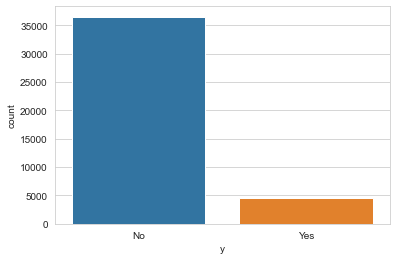

In [137]:
label_counts = df['y'].value_counts()
label_counts_percentage = df['y'].value_counts(normalize=True).mul(100)
print(label_counts)
print(label_counts_percentage)

class_count_no, class_count_yes = df['y'].value_counts()

class_no = df[df['y'] == 'no']
class_yes = df[df['y'] == 'yes']

# visualize the target variable
g = sns.countplot(df['y'])
g.set_xticklabels(['No','Yes'])
plt.show()

Notice that only 11% of the cases have subscribed the term deposit. It is enough to bias the training of any model.

We will deal with this imbalance problem while training models.

## Prepare data for scikit-learn model

With the data prepared, it is time to create the numpy arrays required for the scikit-learn model. 

The code in the cell below replaces the label values with 1 and 0 and creates a numpy array of the label values. Execute this code. 

In [138]:
df.y.replace(('yes', 'no'), (1, 0), inplace=True)
y = np.array(df['y'])

X = df.drop(['duration','emp.var.rate','nr.employed','y'], axis=1)
X.head()

,age,job,marital,education,default,housing,loan,contact,month,day_of_week,campaign,pdays,previous,poutcome,cons.price.idx,cons.conf.idx,euribor3m
0,56,housemaid,married,basic.4y,no,no,no,telephone,may,mon,1,999,0,nonexistent,93.994,-36.4,4.857
1,57,services,married,high.school,unknown,no,no,telephone,may,mon,1,999,0,nonexistent,93.994,-36.4,4.857
2,37,services,married,high.school,no,yes,no,telephone,may,mon,1,999,0,nonexistent,93.994,-36.4,4.857
3,40,admin.,married,basic.6y,no,no,no,telephone,may,mon,1,999,0,nonexistent,93.994,-36.4,4.857
4,56,services,married,high.school,no,no,yes,telephone,may,mon,1,999,0,nonexistent,93.994,-36.4,4.857


### Hot Encoding

Execute the code in the cell below to perform this processing and examine the results. 

In [139]:
X = pd.get_dummies(X)
X.head()

,age,campaign,pdays,previous,cons.price.idx,cons.conf.idx,euribor3m,job_admin.,job_blue-collar,job_entrepreneur,...,month_oct,month_sep,day_of_week_fri,day_of_week_mon,day_of_week_thu,day_of_week_tue,day_of_week_wed,poutcome_failure,poutcome_nonexistent,poutcome_success
0,56,1,999,0,93.994,-36.4,4.857,0,0,0,...,0,0,0,1,0,0,0,0,1,0
1,57,1,999,0,93.994,-36.4,4.857,0,0,0,...,0,0,0,1,0,0,0,0,1,0
2,37,1,999,0,93.994,-36.4,4.857,0,0,0,...,0,0,0,1,0,0,0,0,1,0
3,40,1,999,0,93.994,-36.4,4.857,1,0,0,...,0,0,0,1,0,0,0,0,1,0
4,56,1,999,0,93.994,-36.4,4.857,0,0,0,...,0,0,0,1,0,0,0,0,1,0


You must split the cases into training and test data sets. This step is critical. If machine learning models are tested on the training data, the results will be both biased and overly optimistic.

Execute the code. 

In [140]:
import sklearn.model_selection as ms
X_train, X_test, y_train, y_test = ms.train_test_split(X, y, test_size = 0.3, random_state = 5)
X_train.shape, X_test.shape, y_train.shape, y_test.shape

((28823, 60), (12353, 60), (28823,), (12353,))

## Decision Tree Classifier Building in Scikit-learn

#### Importing Required Libraries
Let's first load the required libraries. 

In [141]:
from sklearn.tree import DecisionTreeClassifier
from matplotlib import pyplot

#### Building Decision Tree Model

Let's create a Decision Tree Model using Scikit-learn.

We will use a decision tree via the DecisionTreeClassifier and test different tree depths with the “max_depth” argument to avoid overfitting.

We will enumerate each tree depth, fit a tree with a given depth on the training dataset, then evaluate the tree on both the train and test sets.

The expectation is that as the depth of the tree increases, performance on train and test will improve to a point, and as the tree gets too deep, it will begin to overfit the training dataset at the expense of worse performance on the holdout test set.

At the end of the run, we will then plot all model accuracy scores on the train and test sets for visual comparison.

>1, train: 0.721, test: 0.717
>2, train: 0.721, test: 0.718
>3, train: 0.837, test: 0.833
>4, train: 0.835, test: 0.832
>5, train: 0.834, test: 0.829
>6, train: 0.865, test: 0.857
>7, train: 0.832, test: 0.821
>8, train: 0.861, test: 0.846
>9, train: 0.860, test: 0.838
>10, train: 0.849, test: 0.820
>11, train: 0.850, test: 0.808
>12, train: 0.846, test: 0.792
>13, train: 0.863, test: 0.805
>14, train: 0.858, test: 0.790
>15, train: 0.867, test: 0.790
>16, train: 0.882, test: 0.794
>17, train: 0.886, test: 0.786
>18, train: 0.902, test: 0.793
>19, train: 0.914, test: 0.797
>20, train: 0.929, test: 0.807


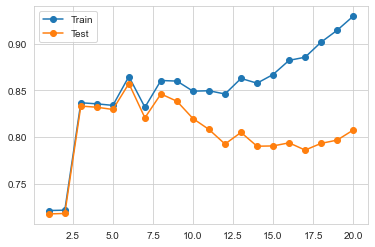

In [142]:
from sklearn.metrics import accuracy_score
# define lists to collect scores
train_scores, test_scores = list(), list()
# define the tree depths to evaluate
values = [i for i in range(1, 21)]
# evaluate a decision tree for each depth
for i in values:
	# configure the model
	model = DecisionTreeClassifier(max_depth=i, random_state=10, class_weight='balanced')
	# fit model on the training dataset
	model.fit(X_train, y_train)
	# evaluate on the train dataset
	train_yhat = model.predict(X_train)
	train_acc = accuracy_score(y_train, train_yhat)
	train_scores.append(train_acc)
	# evaluate on the test dataset
	test_yhat = model.predict(X_test)
	test_acc = accuracy_score(y_test, test_yhat)
	test_scores.append(test_acc)
	# summarize progress
	print('>%d, train: %.3f, test: %.3f' % (i, train_acc, test_acc))
# plot of train and test scores vs tree depth
pyplot.plot(values, train_scores, '-o', label='Train')
pyplot.plot(values, test_scores, '-o', label='Test')
pyplot.legend()
pyplot.show()

In this case, we can see a trend of increasing accuracy on the training dataset with the tree depth to a point around a depth of 19-20 levels where the tree fits the training dataset perfectly.

We can also see that the accuracy on the test set improves with tree depth until a depth of about six levels, after which accuracy begins to get worse with each increase in tree depth.

This is exactly what we would expect to see in a pattern of overfitting.

We would choose a tree depth of six before the model begins to overfit the training dataset.

Notice in the code below that we've also used class_weight='balanced' to deal with the class imbalance problem.

In [143]:
clf_gini = DecisionTreeClassifier(criterion='gini', max_depth=6, random_state=5, class_weight='balanced')

# fit the model
clf_gini.fit(X_train, y_train)

DecisionTreeClassifier(class_weight='balanced', max_depth=6, random_state=5)

In [144]:
#Predict the response for test dataset
y_pred_gini = clf_gini.predict(X_test)

#### Evaluating Model
Let's estimate, how accurately the classifier or model can predict the type of cultivars.

Accuracy can be computed by comparing actual test set values and predicted values.

In [145]:
from sklearn.metrics import accuracy_score

print('Model accuracy score with criterion gini index: {0:0.4f}'. format(accuracy_score(y_test, y_pred_gini)))

Model accuracy score with criterion gini index: 0.8571


Well, you got a classification rate of 85.71%, considered as good accuracy

#### Confusion matrix

A confusion matrix is a tool for summarizing the performance of a classification algorithm.


In [146]:
import sklearn.metrics as sklm
def print_metrics(labels, scores, probs):
    metrics = sklm.precision_recall_fscore_support(labels, scores)
    conf = sklm.confusion_matrix(labels, scores)
    print('                 Confusion matrix')
    print('                 Score positive    Score negative')
    print('Actual positive    %6d' % conf[0,0] + '             %5d' % conf[0,1])
    print('Actual negative    %6d' % conf[1,0] + '             %5d' % conf[1,1])
    print('')
    print('Accuracy  %0.2f' % sklm.accuracy_score(labels, scores))
    print(' ')
    print('AUC  %0.2f' % sklm.roc_auc_score(labels, probs[:,1]))
    print(' ')
    print('           Positive      Negative')
    print('Num case   %6d' % metrics[3][0] + '        %6d' % metrics[3][1])
    print('Precision  %6.2f' % metrics[0][0] + '        %6.2f' % metrics[0][1])
    print('Recall     %6.2f' % metrics[1][0] + '        %6.2f' % metrics[1][1])
    print('F1         %6.2f' % metrics[2][0] + '        %6.2f' % metrics[2][1])


probabilities = clf_gini.predict_proba(X_test)    
print_metrics(y_test, y_pred_gini, probabilities)    

                 Confusion matrix
                 Score positive    Score negative
Actual positive      9790              1189
Actual negative       576               798

Accuracy  0.86
 
AUC  0.79
 
           Positive      Negative
Num case    10979          1374
Precision    0.94          0.40
Recall       0.89          0.58
F1           0.92          0.47


In Decision tree, We've got 86% Accuracy and AUC of 0.79

#### Compare the train-set and test-set accuracy

Now, I will compare the train-set and test-set accuracy to check for overfitting.

In [147]:
y_pred_train_gini = clf_gini.predict(X_train)

print('Training set score: {:.4f}'.format(clf_gini.score(X_train, y_train)))

print('Test set score: {:.4f}'.format(clf_gini.score(X_test, y_test)))

Training set score: 0.8648
Test set score: 0.8571


Here, the training-set accuracy score is 0.8648 while the test-set accuracy to be 0.8571. These two values are quite comparable. So, there is no sign of overfitting.

#### Visualize decision-trees

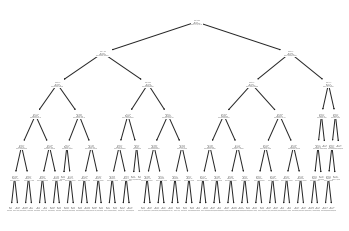

In [148]:
from sklearn import tree

_ = tree.plot_tree(clf_gini.fit(X_train, y_train)) 

plt.savefig('dec_tree_gini.pdf')

## Random Forest Classifier Building in Scikit-learn

#### Tree depth

>1, train: 0.812, test: 0.806
>2, train: 0.801, test: 0.793
>3, train: 0.778, test: 0.770
>4, train: 0.780, test: 0.774
>5, train: 0.820, test: 0.813
>6, train: 0.829, test: 0.822
>7, train: 0.840, test: 0.832
>8, train: 0.846, test: 0.837
>9, train: 0.857, test: 0.849
>10, train: 0.867, test: 0.856
>11, train: 0.873, test: 0.859
>12, train: 0.882, test: 0.864
>13, train: 0.894, test: 0.870
>14, train: 0.904, test: 0.873
>15, train: 0.916, test: 0.876
>16, train: 0.929, test: 0.881
>17, train: 0.940, test: 0.883
>18, train: 0.951, test: 0.886
>19, train: 0.960, test: 0.887
>20, train: 0.968, test: 0.889


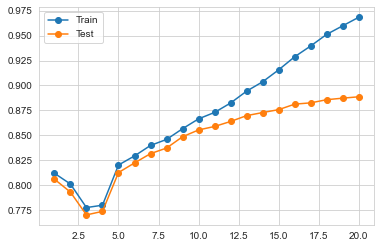

In [143]:
from sklearn.metrics import accuracy_score
# define lists to collect scores
train_scores, test_scores = list(), list()
# define the tree depths to evaluate
values = [i for i in range(1, 21)]
# evaluate a decision tree for each depth
for i in values:
	# configure the model
	model = RandomForestClassifier(max_depth=i, random_state=5, class_weight='balanced')
	# fit model on the training dataset
	model.fit(X_train, y_train)
	# evaluate on the train dataset
	train_yhat = model.predict(X_train)
	train_acc = accuracy_score(y_train, train_yhat)
	train_scores.append(train_acc)
	# evaluate on the test dataset
	test_yhat = model.predict(X_test)
	test_acc = accuracy_score(y_test, test_yhat)
	test_scores.append(test_acc)
	# summarize progress
	print('>%d, train: %.3f, test: %.3f' % (i, train_acc, test_acc))
# plot of train and test scores vs tree depth
pyplot.plot(values, train_scores, '-o', label='Train')
pyplot.plot(values, test_scores, '-o', label='Test')
pyplot.legend()
pyplot.show()

Notice that here test accuracy is increasing with the training accuracy till the end of the loop, so here I am leaving it and let the model decide its max_depth.

#### Random Forest Classifier model with default parameters

In [149]:
# import Random Forest classifier
from sklearn.ensemble import RandomForestClassifier

# instantiate the classifier 
rfc = RandomForestClassifier(n_estimators=10, random_state=5, class_weight='balanced')

# fit the model
rfc.fit(X_train, y_train)

# Predict the Test set results
y_pred = rfc.predict(X_test)

# Check accuracy score 
from sklearn.metrics import accuracy_score
print('Model accuracy score with 10 decision-trees : {0:0.4f}'. format(accuracy_score(y_test, y_pred)))

Model accuracy score with 10 decision-trees : 0.8914


Here, y_test are the true class labels and y_pred are the predicted class labels in the test-set.

class_weight='balanced' is used here too to deal with the class imbalance problem.

Here, I have build the Random Forest Classifier model with default parameter of n_estimators = 10. So, I have used 10 decision-trees to build the model. Now, I will increase the number of decision-trees and see its effect on accuracy.

#### Random Forest Classifier model with parameter n_estimators=100

In [150]:
# instantiate the classifier with n_estimators = 100
rfc_100 = RandomForestClassifier(n_estimators=100, random_state=5, class_weight='balanced')

# fit the model to the training set
rfc_100.fit(X_train, y_train)

# Predict on the test set results
y_pred_100 = rfc_100.predict(X_test)

# Check accuracy score 
print('Model accuracy score with 100 decision-trees : {0:0.4f}'. format(accuracy_score(y_test, y_pred_100)))

Model accuracy score with 100 decision-trees : 0.8924


The model accuracy score with 10 decision-trees is 0.8914 and the same with 100 decision-trees is 0.8924. So as expected accuracy increases with number of decision-trees in the model.

### Find important features with Random Forest model

Until now, I have used all the features given in the model. Now, I will select only the important features, build the model using these features and see its effect on accuracy.

- Firstly, I specify the random forest instance, indicating the number of trees.
- Then I use selectFromModel object from sklearn to automatically select the features.
- To see which features are important we can use get_support method on the fitted model.
- We can now make a list and count the selected features.

In [151]:
from sklearn.feature_selection import SelectFromModel
sel = SelectFromModel(RandomForestClassifier(n_estimators = 100, random_state=5))
sel.fit(X_train, y_train)
selected_feat= X_train.columns[(sel.get_support())]
print(len(selected_feat))
print(selected_feat)

12
Index(['age', 'campaign', 'pdays', 'previous', 'cons.price.idx',
       'cons.conf.idx', 'euribor3m', 'job_admin.', 'education_high.school',
       'housing_no', 'housing_yes', 'poutcome_success'],
      dtype='object')


Note that there are only 12 important features

#### Build Random Forest model on selected features

Now I am selecting the best features and splitting the data to create the model again

In [152]:
best_selected_features = X[selected_feat]
# best_selected_features.head()
X_train_2, X_test_2, y_train_2, y_test_2 = ms.train_test_split(best_selected_features, y, test_size = 0.3, random_state = 5)
X_train_2.shape, X_test_2.shape, y_train_2.shape, y_test_2.shape

((28823, 12), (12353, 12), (28823,), (12353,))

In [153]:
# create the classifier with n_estimators = 100
clf = RandomForestClassifier(n_estimators=100, random_state=5, class_weight='balanced')

# fit the model to the training set
clf.fit(X_train_2, y_train_2)

# Predict on the test set results
y_pred = clf.predict(X_test_2)

# Check accuracy score 
print('Model accuracy score with best features selected : {0:0.4f}'. format(accuracy_score(y_test_2, y_pred)))

Model accuracy score with best features selected : 0.8620


Here our model's accuracy is decreased from 89% to 86% indicating that there were some feature which were creating biasness in our model.

In [154]:
probabilities = clf.predict_proba(X_test_2)    
print_metrics(y_test_2, y_pred, probabilities)    

                 Confusion matrix
                 Score positive    Score negative
Actual positive     10233               746
Actual negative       959               415

Accuracy  0.86
 
AUC  0.74
 
           Positive      Negative
Num case    10979          1374
Precision    0.91          0.36
Recall       0.93          0.30
F1           0.92          0.33


In Random Forest model, we've got 86% Accuracy and AUC of 0.74

## Neural Network Classifier Building in Scikit-learn

We will start creating NN classifier by:

- splitting the dataset
- scaling
- resampling

In [155]:
df.y.replace(('yes', 'no'), (1, 0), inplace=True)
y = np.array(df['y'])

X = df.drop(['duration','emp.var.rate','nr.employed','y'], axis=1)

X = pd.get_dummies(X)

import sklearn.model_selection as ms
nr.seed(1112)
X_train, X_test, y_train, y_test = ms.train_test_split(X, y, test_size = 0.3, random_state = 5)

from sklearn import preprocessing
scale = preprocessing.StandardScaler()
from imblearn.over_sampling import SMOTE
scale.fit(X_train)
X_train = scale.transform(X_train)

X_train, y_train = SMOTE().fit_resample(X_train, y_train)

print('Original dataset shape', Counter(y))
print('Resample dataset shape', Counter(y_train))

Original dataset shape Counter({0: 36537, 1: 4639})
Resample dataset shape Counter({0: 25558, 1: 25558})


Now that our data is balanced, it is time to train our model

In [156]:
from sklearn.neural_network import MLPClassifier
nr.seed(1315)
nn_mod = MLPClassifier(hidden_layer_sizes = (3,))
nn_mod.fit(X_train, y_train)

stX = scale.transform(X_test)
scores = nn_mod.predict(X_test)

probabilities = nn_mod.predict_proba(X_test)
print_metrics(y_test, scores, probabilities) 

                 Confusion matrix
                 Score positive    Score negative
Actual positive     10838               141
Actual negative      1111               263

Accuracy  0.90
 
AUC  0.71
 
           Positive      Negative
Num case    10979          1374
Precision    0.91          0.65
Recall       0.99          0.19
F1           0.95          0.30


In [114]:
nr.seed(1216)
nn_mod = MLPClassifier(hidden_layer_sizes = (5,))
nn_mod.fit(X_train, y_train)
stX = scale.transform(X_test)
scores = nn_mod.predict(X_test)
probabilities = nn_mod.predict_proba(X_test)
print_metrics(y_test, scores, probabilities)

                 Confusion matrix
                 Score positive    Score negative
Actual positive     10979                 0
Actual negative      1374                 0

Accuracy  0.89
 
AUC  0.59
 
           Positive      Negative
Num case    10979          1374
Precision    0.89          0.00
Recall       1.00          0.00
F1           0.94          0.00


In [115]:
nr.seed(1217)
nn_mod = MLPClassifier(hidden_layer_sizes = (3,3))
nn_mod.fit(X_train, y_train)
stX = scale.transform(X_test)
scores = nn_mod.predict(X_test)
probabilities = nn_mod.predict_proba(X_test)
print_metrics(y_test, scores, probabilities)

                 Confusion matrix
                 Score positive    Score negative
Actual positive       178             10801
Actual negative       290              1084

Accuracy  0.10
 
AUC  0.40
 
           Positive      Negative
Num case    10979          1374
Precision    0.38          0.09
Recall       0.02          0.79
F1           0.03          0.16


In [116]:
nr.seed(1218)
nn_mod = MLPClassifier(hidden_layer_sizes = (3,5))
nn_mod.fit(X_train, y_train)
stX = scale.transform(X_test)
scores = nn_mod.predict(X_test)
probabilities = nn_mod.predict_proba(X_test)
print_metrics(y_test, scores, probabilities)

                 Confusion matrix
                 Score positive    Score negative
Actual positive     10899                80
Actual negative      1237               137

Accuracy  0.89
 
AUC  0.65
 
           Positive      Negative
Num case    10979          1374
Precision    0.90          0.63
Recall       0.99          0.10
F1           0.94          0.17


In [117]:
nr.seed(1219)
nn_mod = MLPClassifier(hidden_layer_sizes = (5,5))
nn_mod.fit(X_train, y_train)
stX = scale.transform(X_test)
scores = nn_mod.predict(X_test)
probabilities = nn_mod.predict_proba(X_test)
print_metrics(y_test, scores, probabilities)

                 Confusion matrix
                 Score positive    Score negative
Actual positive     10929                50
Actual negative      1295                79

Accuracy  0.89
 
AUC  0.68
 
           Positive      Negative
Num case    10979          1374
Precision    0.89          0.61
Recall       1.00          0.06
F1           0.94          0.11


Seeing accuracy and AUC of all of the above NN classifiers, we can say that our models fits best with 1 layer and 3 neurons.

Let's check the metrics with the best features. Execute the code below.

In [157]:
X_train_2, X_test_2, y_train_2, y_test_2 = ms.train_test_split(best_selected_features, y, test_size = 0.3, random_state = 5)

scale = preprocessing.StandardScaler()
scale.fit(X_train_2)
X_train_2 = scale.transform(X_train_2)

X_train_2, y_train_2 = SMOTE().fit_resample(X_train_2, y_train_2)

from sklearn.neural_network import MLPClassifier
nr.seed(1415)
nn_mod = MLPClassifier(hidden_layer_sizes = (3,))
nn_mod.fit(X_train_2, y_train_2)

stx2 = scale.transform(X_test_2)
scores = nn_mod.predict(X_test_2)

probabilities = nn_mod.predict_proba(X_test_2)
print_metrics(y_test_2, scores, probabilities) 

                 Confusion matrix
                 Score positive    Score negative
Actual positive     10979                 0
Actual negative      1374                 0

Accuracy  0.89
 
AUC  0.68
 
           Positive      Negative
Num case    10979          1374
Precision    0.89          0.00
Recall       1.00          0.00
F1           0.94          0.00


Training data with selected features ruins our model performance, so we'll go with the data containing all features with one layer and 3 neurons.

Execute the code below to have a look on our final NN model

In [158]:
df.y.replace(('yes', 'no'), (1, 0), inplace=True)
y = np.array(df['y'])

X = df.drop(['duration','emp.var.rate','nr.employed','y'], axis=1)

X = pd.get_dummies(X)

import sklearn.model_selection as ms
nr.seed(1112)
X_train, X_test, y_train, y_test = ms.train_test_split(X, y, test_size = 0.3, random_state = 5)

from sklearn import preprocessing
scale = preprocessing.StandardScaler()
from imblearn.over_sampling import SMOTE
scale.fit(X_train)
X_train = scale.transform(X_train)

X_train, y_train = SMOTE().fit_resample(X_train, y_train)

from sklearn.neural_network import MLPClassifier
nr.seed(1315)
nn_mod = MLPClassifier(hidden_layer_sizes = (3,))
nn_mod.fit(X_train, y_train)

stX = scale.transform(X_test)
scores = nn_mod.predict(X_test)

probabilities = nn_mod.predict_proba(X_test)
print_metrics(y_test, scores, probabilities)

                 Confusion matrix
                 Score positive    Score negative
Actual positive     10838               141
Actual negative      1111               263

Accuracy  0.90
 
AUC  0.71
 
           Positive      Negative
Num case    10979          1374
Precision    0.91          0.65
Recall       0.99          0.19
F1           0.95          0.30


In Neural Network classifier, we've got 90% Accuracy and AUC of 0.71

## Conclusion:

In this project, we've done the following things:

- Data preparation and pre-processing 
- Exploratory data analysis
- Model training, evaluation and optimization (Decision Tree, Random Forest, Neural Network)
    - Decision Tree - Accuracy: 86% and AUC: 0.79
    - Random Forest - Accuracy: 86% and AUC: 0.74
    - Neural Network - Accuracy: 90% and AUC: 0.71